In [2]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
df_credit = pd.read_csv("C:/Users/Kai/Desktop/Assignment3/data/credit-g_preproccess.csv",index_col=0)

In [3]:
# First Look at the data:
## Looking the Type of Data
## Null Numbers
## Unique values

df_credit.head(6)

,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
checking_status,,,,,,,,,,,,,,,,,,,,
<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,4,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good


In [4]:
#Searching for Missings,type of data and also known the shape of data
print(df_credit.info())

# Let us check if there is any null values
print(df_credit.isnull().sum())

df_credit.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, <0 to 0<=X<200
Data columns (total 20 columns):
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null int64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null int64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null int64
property_magnitude        1000 non-null object
age                       1000 non-null int64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null int64
job                       1000 non-null object
num_dependents            1000 non-null int64
own_telephone             1000 non-null object
foreign_worker            1000 non-null object
class  

(1000, 20)

In [5]:
#Looking unique values
print(df_credit.nunique())

duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
class                       2
dtype: int64


In [6]:
# Transforming the data into Dummy variables (IMPORTANT)
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

df_credit, new_colunms = one_hot_encoder(df_credit)
df_credit.head(6)


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,credit_history_'critical/other existing credit',credit_history_'delayed previously',credit_history_'existing paid',...,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_'unemp/unskilled non res',job_'unskilled resident',job_skilled,own_telephone_yes,foreign_worker_yes,class_good
checking_status,,,,,,,,,,,,,,,,,,,,,
<0,6,1169,4,4,67,2,1,1,0,0,...,1,0,1,0,0,0,1,1,1,1
0<=X<200,48,5951,2,2,22,1,1,0,0,1,...,1,0,1,0,0,0,1,0,1,0
'no checking',12,2096,2,3,49,1,2,1,0,0,...,1,0,1,0,0,1,0,0,1,1
<0,42,7882,2,4,45,1,2,0,0,1,...,1,0,0,0,0,0,1,0,1,1
<0,24,4870,3,4,53,2,2,0,1,0,...,1,0,0,0,0,0,1,0,1,0
'no checking',36,9055,2,4,35,1,2,0,0,1,...,1,0,0,0,0,1,0,1,1,1


In [7]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, <0 to 0<=X<200
Data columns (total 46 columns):
duration                                           1000 non-null int64
credit_amount                                      1000 non-null int64
installment_commitment                             1000 non-null int64
residence_since                                    1000 non-null int64
age                                                1000 non-null int64
existing_credits                                   1000 non-null int64
num_dependents                                     1000 non-null int64
credit_history_'critical/other existing credit'    1000 non-null uint8
credit_history_'delayed previously'                1000 non-null uint8
credit_history_'existing paid'                     1000 non-null uint8
credit_history_'no credits/all paid'               1000 non-null uint8
purpose_'new car'                                  1000 non-null uint8
purpose_'used car'                       

In [8]:
new_colunms

["credit_history_'critical/other existing credit'",
 "credit_history_'delayed previously'",
 "credit_history_'existing paid'",
 "credit_history_'no credits/all paid'",
 "purpose_'new car'",
 "purpose_'used car'",
 'purpose_business',
 'purpose_education',
 'purpose_furniture/equipment',
 'purpose_other',
 'purpose_radio/tv',
 'purpose_repairs',
 'purpose_retraining',
 'savings_status_100<=X<500',
 'savings_status_500<=X<1000',
 'savings_status_<100',
 'savings_status_>=1000',
 'employment_4<=X<7',
 'employment_<1',
 'employment_>=7',
 'employment_unemployed',
 "personal_status_'male div/sep'",
 "personal_status_'male mar/wid'",
 "personal_status_'male single'",
 'other_parties_guarantor',
 'other_parties_none',
 "property_magnitude_'no known property'",
 "property_magnitude_'real estate'",
 'property_magnitude_car',
 'other_payment_plans_none',
 'other_payment_plans_stores',
 'housing_own',
 'housing_rent',
 "job_'unemp/unskilled non res'",
 "job_'unskilled resident'",
 'job_skilled',


In [9]:
#Purpose to Dummies Variable
# df_credit = df_credit.merge(pd.get_dummies(df_credit.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)

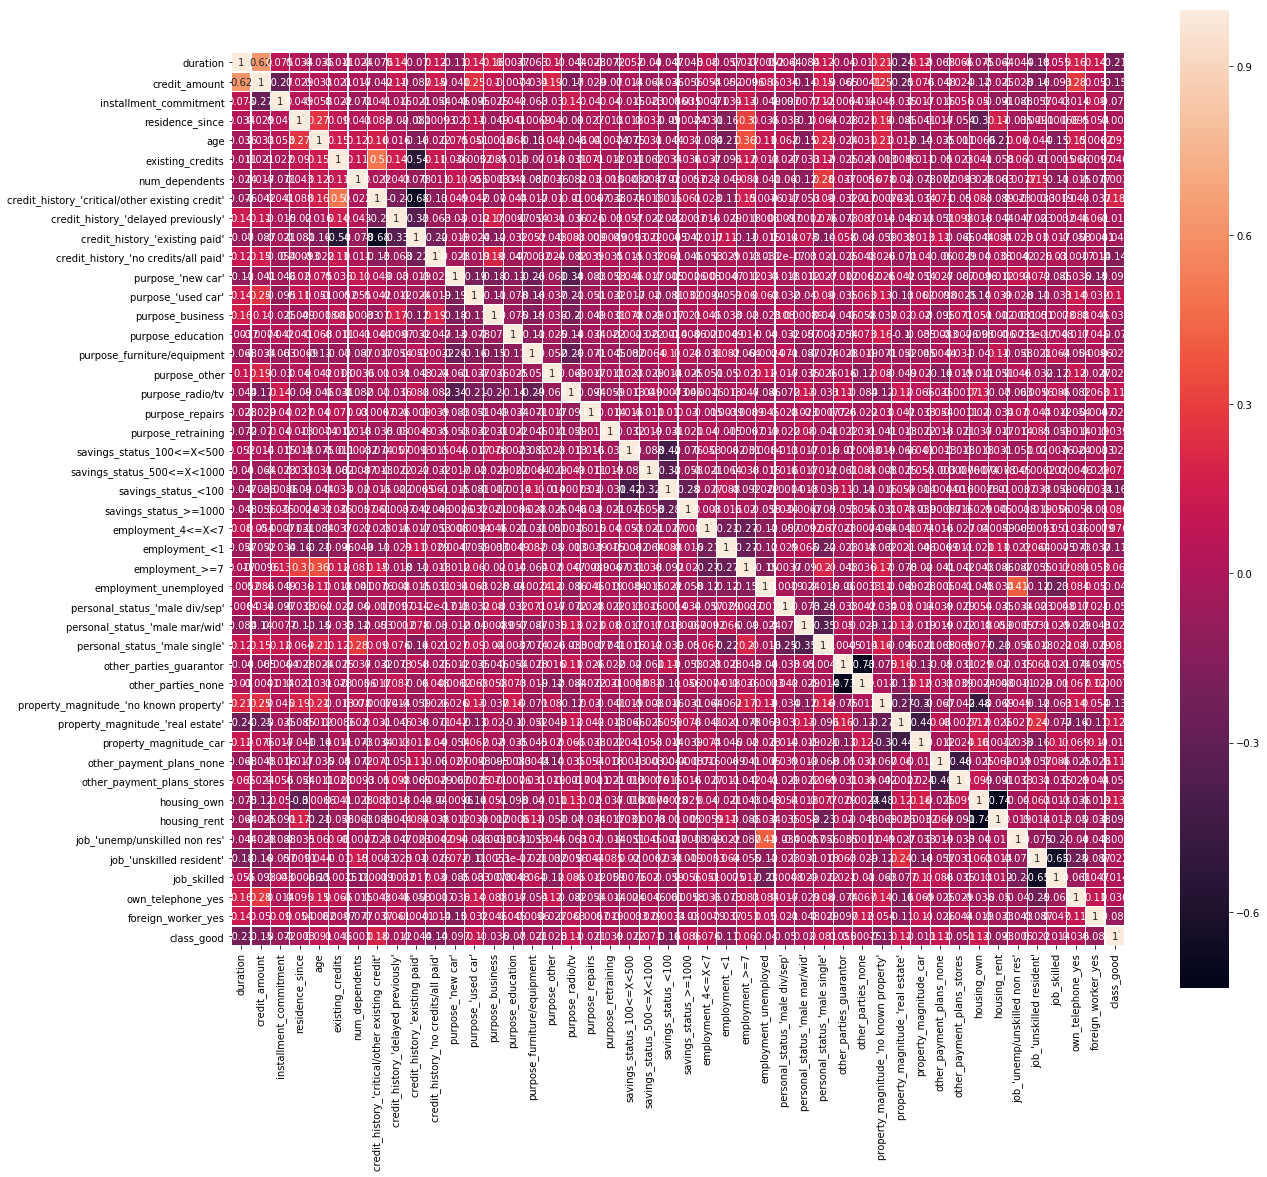

In [10]:
plt.figure(figsize=(20,18))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


#Creating the X and y variables
X = df_credit.drop('class_good', 1).values
y = df_credit["class_good"].values

In [12]:
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
def pltFoldMethodsResult(scor):
    results = []
    names = []
    scoring = scor

    for name, model in models:
            kfold = KFold(n_splits=10, random_state=seed)
            cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
            results.append(cv_results)
            names.append(name)
            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            print(msg)

    # boxplot algorithm comparison
    fig = plt.figure(figsize=(11,6))
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.ylabel(scor)
    plt.show()
    

LR: 0.716000 (0.063400)
LDA: 0.705333 (0.057643)
KNN: 0.646667 (0.046667)
CART: 0.658667 (0.043899)
NB: 0.682667 (0.044542)
RF: 0.654667 (0.046361)
SVM: 0.694667 (0.051103)


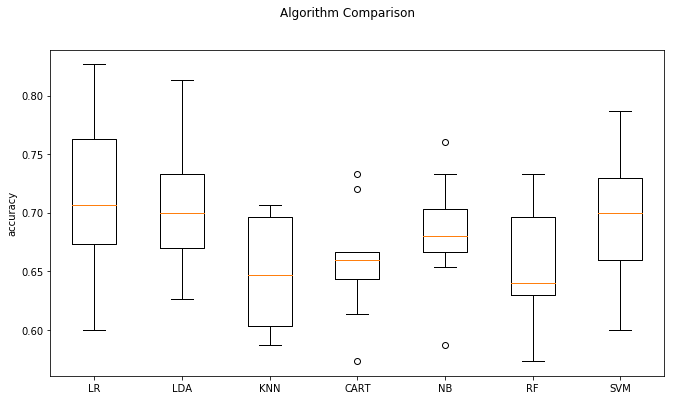

In [13]:
pltFoldMethodsResult('accuracy')

LR: 0.869930 (0.066475)
LDA: 0.850152 (0.062721)
KNN: 0.822758 (0.056701)
CART: 0.738086 (0.054378)
NB: 0.733099 (0.055276)
RF: 0.825220 (0.046380)
SVM: 0.992459 (0.009306)


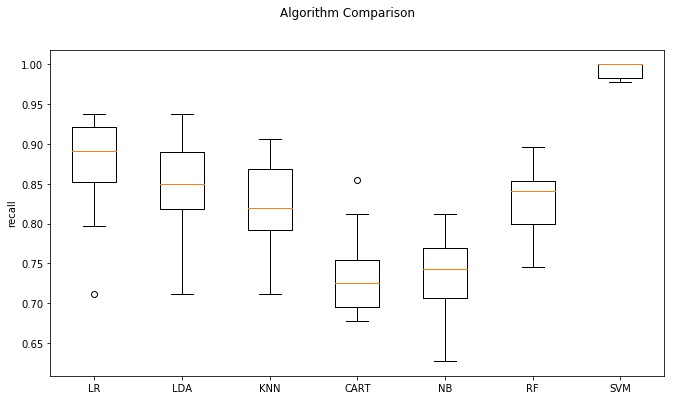

In [14]:
pltFoldMethodsResult('recall')

LR: 0.758665 (0.048387)
LDA: 0.757335 (0.051154)
KNN: 0.712175 (0.049782)
CART: 0.747321 (0.040390)
NB: 0.797683 (0.051433)
RF: 0.758435 (0.049892)
SVM: 0.697352 (0.052462)


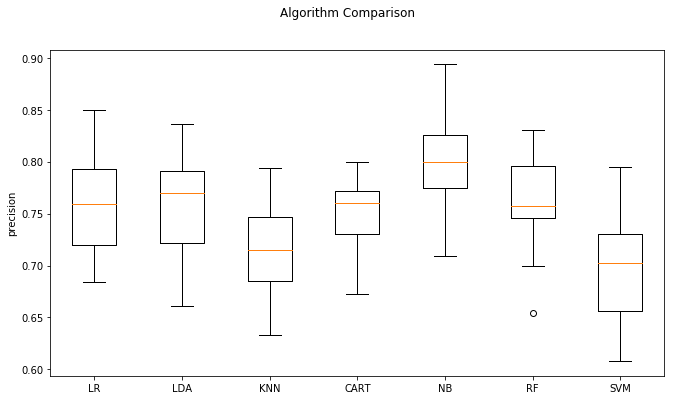

In [15]:
pltFoldMethodsResult('precision')

LR: 0.808803 (0.045077)
LDA: 0.799266 (0.043606)
KNN: 0.762132 (0.042968)
CART: 0.739410 (0.024907)
NB: 0.761749 (0.035167)
RF: 0.763899 (0.034393)
SVM: 0.817950 (0.035744)


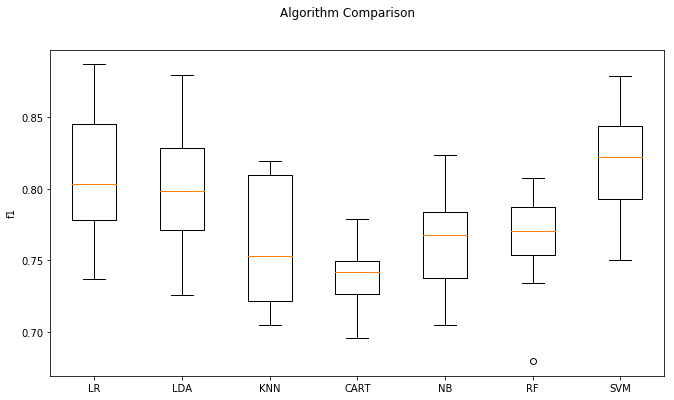

In [16]:
pltFoldMethodsResult('f1')

LR: 0.728378 (0.084313)
LDA: 0.724571 (0.092501)
KNN: 0.570450 (0.064943)
CART: 0.599879 (0.050634)
NB: 0.699443 (0.094225)
RF: 0.685159 (0.055421)
SVM: 0.566436 (0.081009)


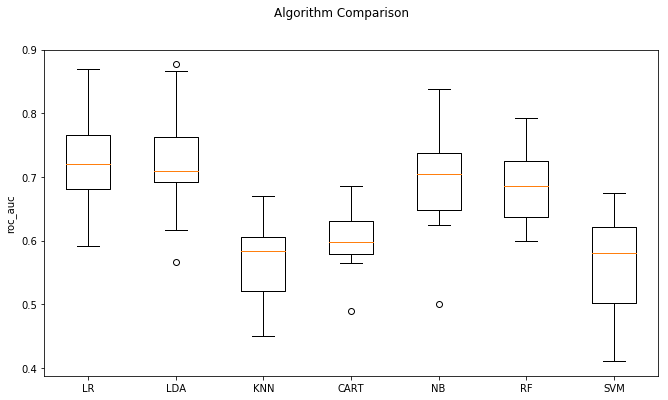

In [17]:
pltFoldMethodsResult('roc_auc')

In [27]:
print(y_train)

[1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0
 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1
 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1
 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0
 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0
 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 

Training score data: 
0.72
0.684


[[ 44  28]
 [ 51 127]]


             precision    recall  f1-score   support

          0       0.46      0.61      0.53        72
          1       0.82      0.71      0.76       178

avg / total       0.72      0.68      0.69       250



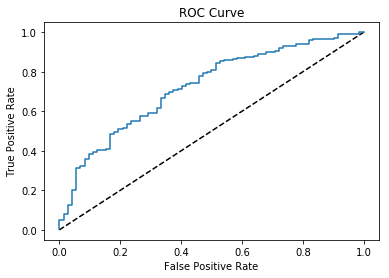

In [19]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve
# Criando o classificador logreg
GNB = GaussianNB()

# Fitting with train data

model = GNB.fit(X_train, y_train)
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))

y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

#Predicting proba
model.predict_proba(X_test)[:,1]
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()